In [ ]:
import numpy as np
import pandas as pd
from numpy import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [ ]:
!pip install scikit-multilearn

In [163]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [165]:
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep learning/PERM_Disclosure_Data_FY2020.csv", sep = ';')
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep learning/PERM_Disclosure_Data_FY2021.csv", sep = ';')
df = pd.concat([df1, df2], axis=0)
# df = df[df['PW_UNIT_OF_PAY'].str.contains('Year', na = False)].reset_index()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,16,19,85,122) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


KeyboardInterrupt: ignored

In [ ]:
def convert_to_int(a):
  if '$' in a:
    a = a.replace('$', '')
  if ' ' in a:
    a = a.replace(' ', '')
  if ',' in a:
    a = a.split(',')[0]
  if a == None:
    return 0
  return int(a)
    

In [ ]:
df = df[df['PW_WAGE'].notna()]
df['PW_WAGE'] = df['PW_WAGE'].apply(lambda x: convert_to_int(x))

In [ ]:
applications = df[[
                   "JOB_TITLE", 
                   "MINIMUM_EDUCATION",
                   "PW_WAGE", 
                   "PW_UNIT_OF_PAY",
                   'PW_SKILL_LEVEL',
                   "REQUIRED_EXPERIENCE", 
                   "ACCEPT_FOREIGN_EDUCATION", 
                   "ACCEPT_ALT_OCCUPATION",
                   'FOREIGN_LANGUAGE_REQUIRED',
                   'COUNTRY_OF_CITIZENSHIP', 
                   "CASE_STATUS"]]
applications = applications.sample(frac=1).reset_index(drop=True)
applications

,JOB_TITLE,MINIMUM_EDUCATION,PW_WAGE,PW_UNIT_OF_PAY,PW_SKILL_LEVEL,REQUIRED_EXPERIENCE,ACCEPT_FOREIGN_EDUCATION,ACCEPT_ALT_OCCUPATION,FOREIGN_LANGUAGE_REQUIRED,COUNTRY_OF_CITIZENSHIP,CASE_STATUS
0,Director of Accounting Operations,Master's,137675,Year,Level IV,N,Y,Y,N,INDIA,Withdrawn
1,Interior Design Director,Master's,52728,Year,Level II,N,N,Y,N,CHINA,Certified-Expired
2,"Software Engineering Manager, Infrastructure",Master's,144040,Year,Level III,Y,Y,Y,N,PORTUGAL,Certified-Expired
3,Applied Scientist II,Master's,65333,Year,Level I,Y,Y,Y,N,TAIWAN,Certified-Expired
4,Software Test Lead,Bachelor's,113110,Year,Level II,N,Y,Y,N,INDIA,Certified-Expired
...,...,...,...,...,...,...,...,...,...,...,...
202250,Senior Engineer Tools & Infrastructure,Bachelor's,129155,Year,NaN,Y,Y,Y,N,INDIA,Certified
202251,"Engineer 2, Software Development & Engineering",Bachelor's,74506,Year,Level I,N,Y,Y,N,INDIA,Certified
202252,Software Application Developer,Bachelor's,119163,Year,Level IV,N,Y,Y,N,INDIA,Certified
202253,Technology Consulting Manager,Bachelor's,163134,Year,Level III,N,Y,Y,N,BRAZIL,Certified


In [ ]:
applications['CASE_STATUS'] = applications['CASE_STATUS'].map({'Denied': 0,  'Certified': 1, 'Withdrawn': 2, 'Certified-Expired': 3})
applications['MINIMUM_EDUCATION'] = applications['MINIMUM_EDUCATION'].map({"Bachelor's": 0,  "Master's": 1, 'Other': 2,"Associate's": 3,"Doctorate": 4,"High School": 5})
applications['PW_UNIT_OF_PAY'] = applications['PW_UNIT_OF_PAY'].map({"Year": 0,  "Hour": 1, 'Week': 2,"Bi-Weekly": 3,"Month": 4})
applications['PW_SKILL_LEVEL'] = applications['PW_SKILL_LEVEL'].map({"N/A": 0,  "Level I": 1, 'Level II': 2,"Level III": 3,"Level VI": 4})
applications['REQUIRED_EXPERIENCE'] = applications['REQUIRED_EXPERIENCE'].map({'Y': 1,  'N': 0})
applications['ACCEPT_FOREIGN_EDUCATION'] = applications['ACCEPT_FOREIGN_EDUCATION'].map({'Y': 1,  'N': 0})
applications['ACCEPT_ALT_OCCUPATION'] = applications['ACCEPT_ALT_OCCUPATION'].map({'Y': 1,  'N': 0})
applications['FOREIGN_LANGUAGE_REQUIRED'] = applications['FOREIGN_LANGUAGE_REQUIRED'].map({'Y': 1,  'N': 0})
applications.shape

(202255, 11)

In [ ]:
applications = applications[applications['MINIMUM_EDUCATION'].notna()]
applications = applications[applications['JOB_TITLE'].notna()]
applications = applications[applications['REQUIRED_EXPERIENCE'].notna()]
applications = applications[applications['ACCEPT_FOREIGN_EDUCATION'].notna()]
applications = applications[applications['ACCEPT_ALT_OCCUPATION'].notna()]
applications = applications[applications['FOREIGN_LANGUAGE_REQUIRED'].notna()]
applications = applications[applications['COUNTRY_OF_CITIZENSHIP'].notna()]
applications = applications[applications['CASE_STATUS'].notna()]
applications = applications[applications['PW_UNIT_OF_PAY'].notna()]
applications = applications[applications['PW_SKILL_LEVEL'].notna()]
applications.shape

(129777, 11)

In [ ]:
denied = applications.loc[applications['CASE_STATUS'] == 0]
denied = denied.iloc[:1000]

certified = applications.loc[applications['CASE_STATUS'] == 1]
certified = certified.iloc[:5000]

# withdrawn = applications.loc[applications['CASE_STATUS'] == 2]
# withdrawn = withdrawn.iloc[:5000]

# certified_expired = applications.loc[applications['CASE_STATUS'] == 3]
# certified_expired = certified_expired.iloc[:5000]

result = denied.append([certified])
result = result.sample(frac=1).reset_index(drop=True)
result.shape

(6000, 11)

In [ ]:
# df_features = result.iloc[:,:-1]
# df_labels = result[["CASE_STATUS"]]
# df_labels

In [ ]:
for x in result.index:
        t = int.from_bytes(result.loc[x, 'JOB_TITLE'].encode('utf-8'), 'little')
        result.loc[x, 'JOB_TITLE'] = t
        
        t = int.from_bytes(result.loc[x, 'COUNTRY_OF_CITIZENSHIP'].encode('utf-8'), 'little')
        result.loc[x, 'COUNTRY_OF_CITIZENSHIP'] = t

In [ ]:
result.shape

(6000, 11)

In [ ]:
# final = pd.concat([df_features, df_labels], axis=1).reindex(df_features.index)
final = result
final.shape

(6000, 11)

In [ ]:
from skmultilearn.model_selection import iterative_train_test_split
x = final.iloc[:,:-1]
y = final[["CASE_STATUS"]]
train_features, test_features, train_labels, test_labels = train_test_split(x, y, test_size = 0.4)
print(train_labels['CASE_STATUS'].value_counts())
print(test_labels['CASE_STATUS'].value_counts())

# train_features = train.iloc[:,:-1].values
# test_features = test.iloc[:,:-1].values
# train_labels = train[["CASE_STATUS"]].values
# test_labels = test[["CASE_STATUS"]].values

1    2980
0     620
Name: CASE_STATUS, dtype: int64
1    2020
0     380
Name: CASE_STATUS, dtype: int64


In [ ]:
scaler = MinMaxScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.fit_transform(test_features)

In [ ]:
train_features

array([[2.17537812e-140, 2.00000000e-001, 3.49469963e-001, ...,
        1.00000000e+000, 0.00000000e+000, 3.34379258e-056],
       [5.20889490e-018, 4.00000000e-001, 4.61560939e-001, ...,
        1.00000000e+000, 0.00000000e+000, 3.34278393e-056],
       [2.17463121e-140, 0.00000000e+000, 4.11148741e-001, ...,
        0.00000000e+000, 0.00000000e+000, 3.34379258e-056],
       ...,
       [3.71396549e-133, 2.00000000e-001, 3.35425060e-001, ...,
        1.00000000e+000, 0.00000000e+000, 3.34379258e-056],
       [1.55777967e-111, 0.00000000e+000, 3.67706302e-001, ...,
        0.00000000e+000, 0.00000000e+000, 3.34278393e-056],
       [9.33998365e-131, 2.00000000e-001, 3.81056625e-001, ...,
        1.00000000e+000, 0.00000000e+000, 3.34278393e-056]])

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation

In [ ]:
model = Sequential()
model.add(Dense(20, input_dim = len(train_features[0, :]), activation = "relu"))
# model.add(Dropout(0.5))
model.add(Dense(200, activation = "relu"))
# model.add(Dropout(0.5))
# model.add(Dense(500, activation = "relu"))
# model.add(Dropout(0.5))
model.add(Dense(3, activation = "sigmoid"))

sgd = tf.keras.optimizers.SGD(learning_rate=0.1, decay=1e-5,momentum=0.9, nesterov=True, name="SGD")
# opt = keras.optimizers.Adam(learning_rate=0.01)
# model.compile(loss='categorical_crossentropy', optimizer=opt)
# model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 20)                220       
                                                                 
 dense_25 (Dense)            (None, 200)               4200      
                                                                 
 dense_26 (Dense)            (None, 3)                 603       
                                                                 
Total params: 5,023
Trainable params: 5,023
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_features, train_labels, epochs = 300, batch_size = 64)

Epoch 1/300
57/57 [==============================] - 1s 3ms/step - loss: 0.4661 - accuracy: 0.8169
Epoch 2/300
57/57 [==============================] - 0s 4ms/step - loss: 0.4090 - accuracy: 0.8353
Epoch 3/300
57/57 [==============================] - 0s 3ms/step - loss: 0.4079 - accuracy: 0.8367
Epoch 4/300
57/57 [==============================] - 0s 4ms/step - loss: 0.4064 - accuracy: 0.8364
Epoch 5/300
57/57 [==============================] - 0s 4ms/step - loss: 0.3989 - accuracy: 0.8394
Epoch 6/300
57/57 [==============================] - 0s 3ms/step - loss: 0.3963 - accuracy: 0.8364
Epoch 7/300
57/57 [==============================] - 0s 3ms/step - loss: 0.3978 - accuracy: 0.8392
Epoch 8/300
57/57 [==============================] - 0s 3ms/step - loss: 0.3941 - accuracy: 0.8403
Epoch 9/300
57/57 [==============================] - 0s 3ms/step - loss: 0.3901 - accuracy: 0.8392
Epoch 10/300
57/57 [==============================] - 0s 3ms/step - loss: 0.3839 - accuracy: 0.8417
Epoch 11/

In [ ]:
score = model.evaluate(test_features, test_labels, batch_size = 64)

38/38 [==============================] - 0s 3ms/step - loss: 0.4795 - accuracy: 0.8292


In [ ]:
score

[0.4794875681400299, 0.8291666507720947]

In [ ]:
preds = model.predict(test_features, batch_size=None, verbose=0, steps = None)

In [ ]:
test_prediction_label = np.argmax(preds.T, axis = 0)

In [ ]:
pred_test_labels = []
for row in test_prediction_label:
        pred_test_labels.append(row)
pd.DataFrame(pred_test_labels)

,0
0,1
1,1
2,1
3,1
4,1
...,...
2395,1
2396,1
2397,1
2398,1


In [ ]:
from sklearn.metrics import classification_report
print("Classification Report for Test Data\n")
print(classification_report(test_prediction_label, test_labels))

Classification Report for Test Data

              precision    recall  f1-score   support

           0       0.34      0.45      0.39       290
           1       0.92      0.88      0.90      2110

    accuracy                           0.83      2400
   macro avg       0.63      0.66      0.64      2400
weighted avg       0.85      0.83      0.84      2400



dict_keys(['loss', 'accuracy'])


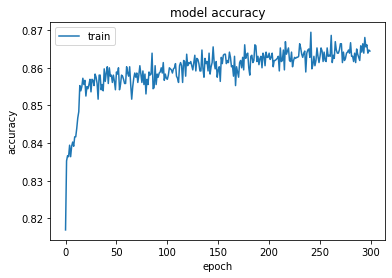

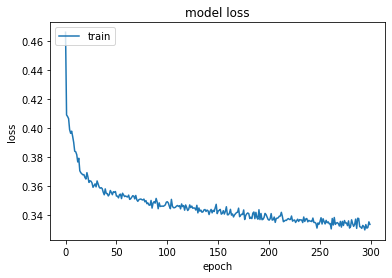

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()